In [1]:
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np

# plt.rcParams.update(plt.rcParamsDefault)
# plt.style.available


In [2]:
df = pd.read_table("BentCigarDifferential.txt", header=-1)

In [3]:
df.head()

,0
0,"42,0.01184577071752757,0.351524497967995,3,false"
1,Score: 9.944855308664494
2,Runtime: 719ms
3,"8,0.6519769196699683,1.100580347174083,1,false"
4,Score: 6.846743176886919E-46


In [4]:
df.shape

(15000, 1)

In [5]:
score = []
param = []

for i in range(df.shape[0]):
    if df[0][i][:5] == "Score":
        score.append(float(df[0][i][7:]))
    elif df[0][i][:7] != "Runtime":
        param.append(df[0][i].split(","))

score = pd.Series(score)
param = pd.DataFrame(param)
df = pd.concat([score, param], axis=1)
df.head()

,0,0,1,2,3,4
0,9.944855e+00,42,0.01184577071752757,0.351524497967995,3,false
1,6.846743e-46,8,0.6519769196699683,1.100580347174083,1,false
2,2.915418e-225,34,0.8278705637211945,1.7848510270955262,3,false
3,1.112091e-10,5,0.7184299880700511,0.3035797746365705,2,false
4,1.827858e+00,38,0.42938146923235276,0.019081134155755297,1,false


In [6]:
score.shape, param.shape, df.shape

((5000L,), (5000, 5), (5000, 6))

In [7]:
df.columns = ['score', 'populationSize', 'crossOverRate', 'differentialRate', 'pertubationSize', 'bestBase']
df['populationSize'] = df.populationSize.astype(float)
df['crossOverRate'] = df.crossOverRate.astype(float)
df['differentialRate'] = df.differentialRate.astype(float)
df["pertubationSize"] = df.pertubationSize.astype(int)

df.head()

,score,populationSize,crossOverRate,differentialRate,pertubationSize,bestBase
0,9.944855e+00,42.0,0.011846,0.351524,3,false
1,6.846743e-46,8.0,0.651977,1.100580,1,false
2,2.915418e-225,34.0,0.827871,1.784851,3,false
3,1.112091e-10,5.0,0.718430,0.303580,2,false
4,1.827858e+00,38.0,0.429381,0.019081,1,false


In [8]:
df[df.score == max(df.score)]

,score,populationSize,crossOverRate,differentialRate,pertubationSize,bestBase
882,10.0,17.0,0.928383,0.663175,2,false


In [9]:
max(df.score)

9.9999999970668068

In [10]:

print np.mean(score[df.pertubationSize == 1]),np.mean(score[df.pertubationSize == 2]),np.mean(score[df.pertubationSize == 3])
print max(score[df.pertubationSize == 1]),max(score[df.pertubationSize == 2]),max(score[df.pertubationSize == 3]),

3.71319468565 3.5640091501 2.947580918
9.99999998181 9.99999999707 9.99999976726


In [11]:
from scipy.interpolate import LSQUnivariateSpline

In [12]:
def interpolate(df):

    for par in df.columns[[1,2,3]]:
        df = df.sort_values(by=[par]).reset_index(drop=True)

        x = np.array(df[par].astype(float))
        y = np.array(df.score)
        t = x[[len(df)/5,2*len(df)/5,3*len(df)/5,4*len(df)/5]] ## np.array([10,20,30,40])

        spl = LSQUnivariateSpline(x, y, t)
        ynew = spl(x)

        argmax = df[par][df.score == max(df.score)].values[0]

        plt.figure()
        plt.title("Random Search DE on BentCigar")
        plt.scatter(x,y, c='b')
        plt.plot(x, ynew, 'r')
        plt.xlim(min(x), max(x))
        plt.ylim(0,max(df.score))
        plt.xlabel(par)
        plt.ylabel('score')
        # plt.plot([argmax, argmax], [0,20], 'r')
        plt.tight_layout()
        plt.show()
        print argmax
    
    


In [13]:
from scipy.interpolate import BivariateSpline
from mpl_toolkits.mplot3d import Axes3D

def plot3d(df, bnd):
    for i in range(1,4):
        for j in range(1,4):
            if i > j:
                pi = df.columns[i]
                pj = df.columns[j]
                
                color= ['red' if l == 1 else 'green' if l==2 else 'blue' for l in df.pertubationSize]

                fig = plt.figure()
                plt.title("Random search DE on BentCigar")
                ax = fig.add_subplot(111, projection='3d')
                
                ax.scatter(df[pi], df[pj], df.score, c=color)
                ax.set_xlabel(pi)
                ax.set_ylabel(pj)
                ax.set_zlabel('score')
                plt.tight_layout()
                plt.show()

                dfx = df[df.score > bnd]
                
                color= ['red' if l == 1 else 'green' if l==2 else 'blue' for l in dfx.pertubationSize]
                
                plt.figure()
                plt.scatter(dfx[pi], dfx[pj], c=color)
                plt.xlabel(pi)
                plt.ylabel(pj)
                plt.xlim(min(df[pi]), max(df[pi]))
                plt.ylim(min(df[pj]), max(df[pj]))
                plt.title("DE Parameters with score > " + str(bnd) + " on BentCigar")
                plt.tight_layout()
                plt.show()

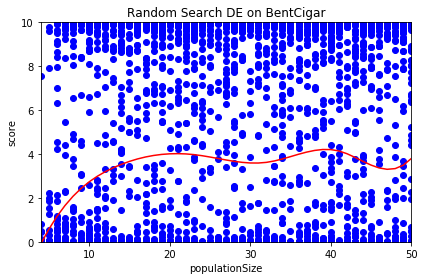

17.0


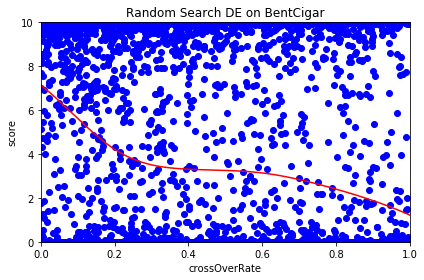

0.928382690358


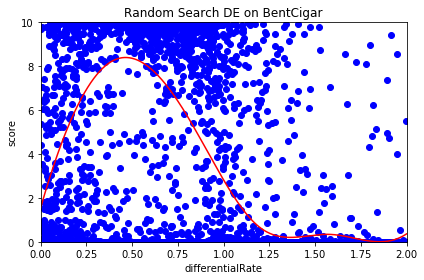

0.663175089887


In [14]:
interpolate(df)

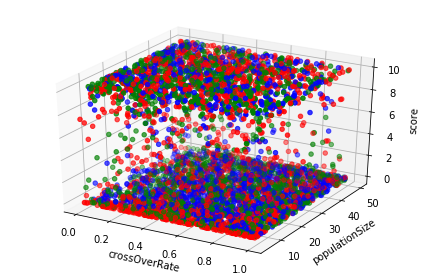

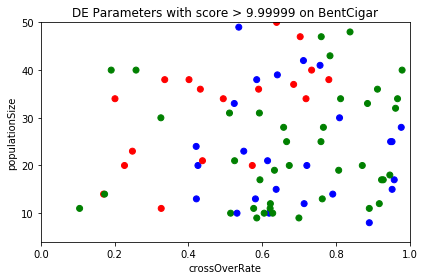

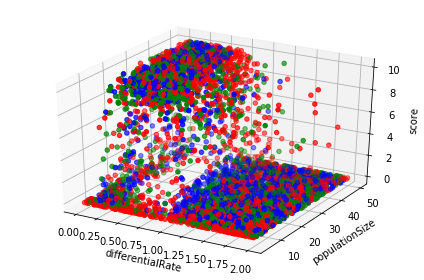

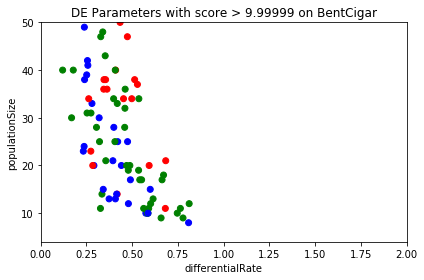

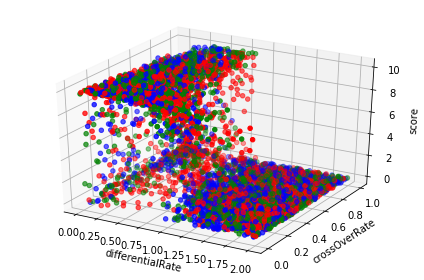

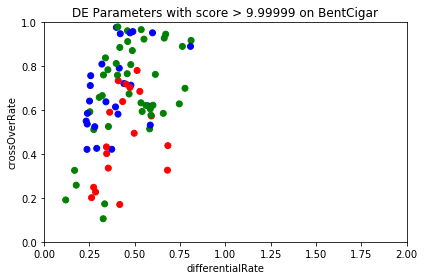

In [15]:
plot3d(df, 9.99999)

In [16]:
df['score'] = df.score.apply(lambda x:-np.log10(10 - x))


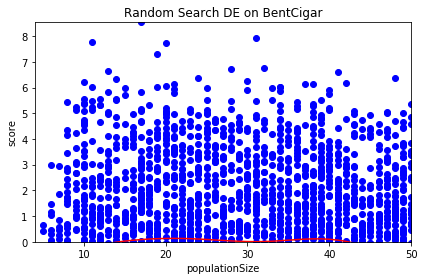

17.0


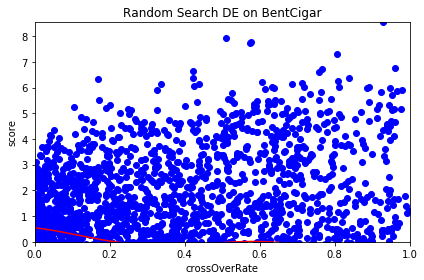

0.928382690358


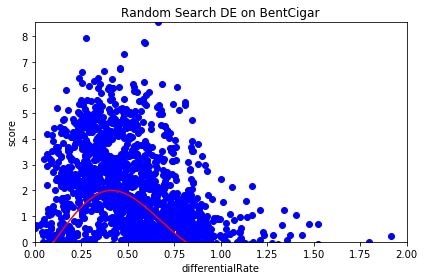

0.663175089887


In [17]:
interpolate(df)

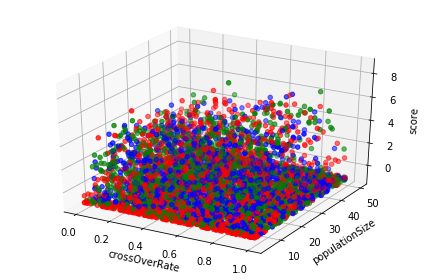

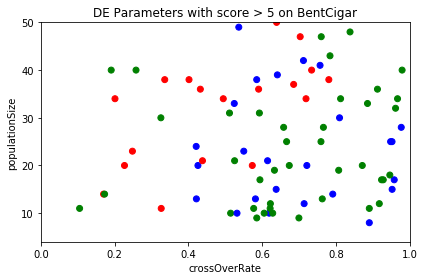

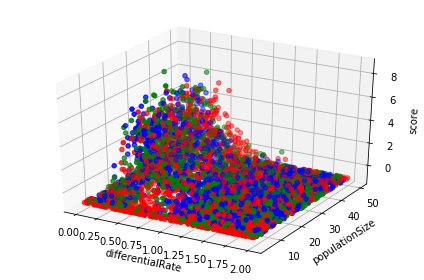

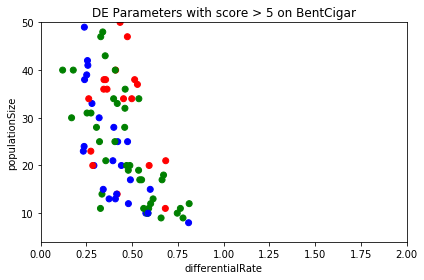

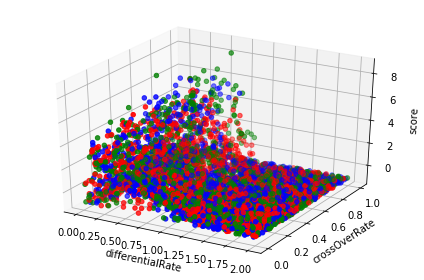

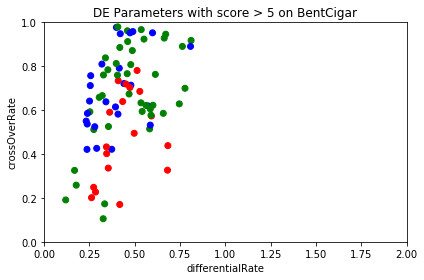

In [18]:
plot3d(df, 5)